In [4]:
from fastsam import FastSAM, FastSAMPrompt

model = FastSAM('./weights/FastSAM-s.pt')
IMAGE_PATH = '../data/input_images/table_clutter.jpg'
DEVICE = 'cpu'


In [5]:
result = model.predict(source=IMAGE_PATH)


[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.
image 1/1 /Users/fatemehyazdanbakhsh/Documents/fatemeh_github/hackathone/hackathon-aug-2023-happy/notebooks/../data/input_images/table_clutter.jpg: 640x480 96 objects, 495.8ms
Speed: 9.3ms preprocess, 495.8ms inference, 82.7ms postprocess per image at shape (1, 3, 640, 640)


In [6]:
masks = result[0].masks.data

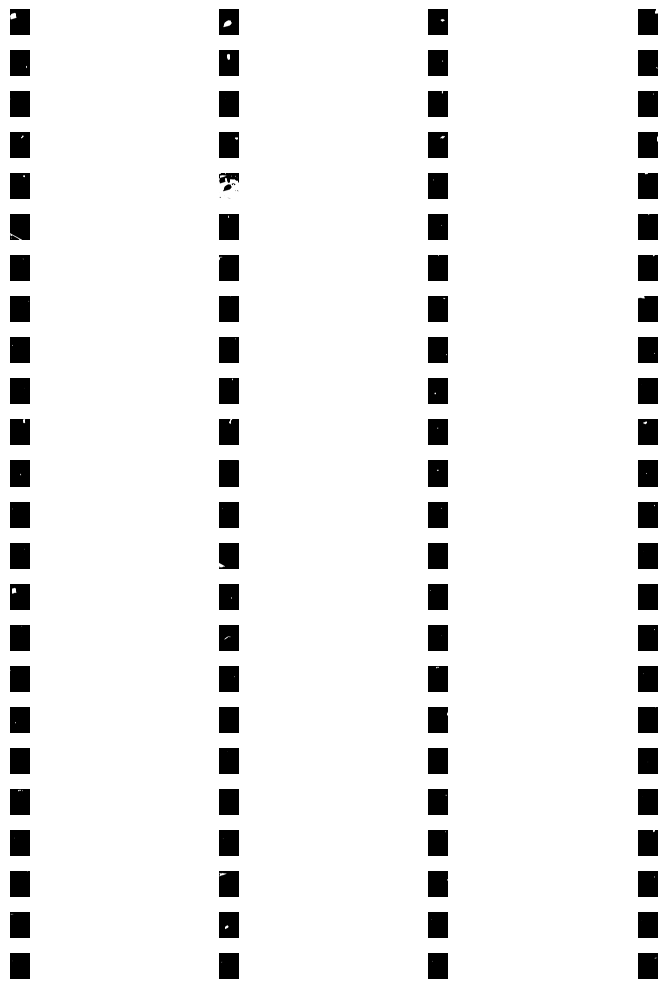

In [7]:
import matplotlib.pyplot as plt
import torch  # Assuming you're using PyTorch

def plot_slices(tensor_data, num_cols=4, figsize=(10, 10), cmap='gray'):
    num_slices = tensor_data.shape[0]
    num_rows = (num_slices + num_cols - 1) // num_cols  # Calculate the number of rows needed
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    for i in range(num_slices):
        row = i // num_cols
        col = i % num_cols
        
        slice_to_plot = tensor_data[i]
        ax = axes[row, col]
        ax.imshow(slice_to_plot, cmap=cmap)
        ax.axis('off')  # Turn off axis labels and ticks
        
    # Remove any empty subplots
    for i in range(num_slices, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])
    
    plt.tight_layout()
    plt.show()


# Call the function to plot slices
plot_slices(result[0].masks.data)


In [53]:
from PIL import Image
import numpy as np

def crop_image_using_tensor(tensor, image_path):
    """
    Crop an image using tensor slices as masks with transparent backgrounds.

    Parameters:
    - tensor: a tensor where each slice is a mask. Can be a numpy ndarray or a PyTorch tensor.
    - image_path (str): path to the image to be cropped.

    Returns:
    - List[Image.Image]: list of cropped image segments.
    """
    
    # Convert tensor to numpy if it's a PyTorch tensor
    if hasattr(tensor, "cpu") and hasattr(tensor, "numpy"):
        tensor = tensor.cpu().numpy()

    # Load image using PIL and convert to RGBA
    img = Image.open(image_path).convert('RGBA')
    original_area = img.width * img.height
    cropped_segments = []
    for mask_slice in tensor:


        # Convert tensor slice to numpy array and then to PIL Image
        mask = Image.fromarray((mask_slice * 255).astype(np.uint8)).resize(img.size).convert("L")
        
        mask_np = np.array(mask)
        mask_area = np.sum(mask_np > 0)


        if (0.011 * original_area <= mask_area) and (mask_area <= 0.5 * original_area):
            
            # Use a transparent image for compositing
            transparent_img = Image.new('RGBA', img.size, (0, 0, 0, 0))
            
            # Composite images
            cropped_segment = Image.composite(img, transparent_img, mask)
            
            # Find bounding box of the mask to further crop unnecessary parts
            bbox = mask.getbbox()
            if bbox:
                cropped_segment = cropped_segment.crop(bbox)
                cropped_segments.append(cropped_segment)
        else:
            print(f"Mask area {mask_area} is not within the desired range. Skipping...")

    return cropped_segments


In [54]:
cropped_segments = crop_image_using_tensor(masks,IMAGE_PATH)

Mask area 25996 is not within the desired range. Skipping...
Mask area 28003 is not within the desired range. Skipping...
Mask area 30409 is not within the desired range. Skipping...
Mask area 7941 is not within the desired range. Skipping...
Mask area 7853 is not within the desired range. Skipping...
Mask area 86828 is not within the desired range. Skipping...
Mask area 13398 is not within the desired range. Skipping...
Mask area 85512 is not within the desired range. Skipping...
Mask area 114957 is not within the desired range. Skipping...
Mask area 70819 is not within the desired range. Skipping...
Mask area 7645350 is not within the desired range. Skipping...
Mask area 5920 is not within the desired range. Skipping...
Mask area 39491 is not within the desired range. Skipping...
Mask area 10925 is not within the desired range. Skipping...
Mask area 20400 is not within the desired range. Skipping...
Mask area 19552 is not within the desired range. Skipping...
Mask area 86085 is not w

In [66]:
# print('hello')
# for segment in cropped_segments: 
#     segment.show()

hello


In [55]:

from PIL import Image
import os

def save_cropped_segments(cropped_segments, output_directory, base_filename="segment_"):
    """
    Save cropped image segments to the specified directory.

    Parameters:
    - cropped_segments (List[Image.Image]): list of cropped image segments.
    - output_directory (str): path to the directory where the segments should be saved.
    - base_filename (str, optional): base name for the cropped files. Defaults to "segment_".
    
    Returns:
    - List[str]: list of file paths where segments are saved.
    """

    # Ensure output directory exists
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    saved_files = []

    for idx, segment in enumerate(cropped_segments, 1):
        filename = f"{base_filename}{idx}.png"
        file_path = os.path.join(output_directory, filename)
        segment.save(file_path)
        saved_files.append(file_path)

    return saved_files

# Example Usage
output_dir = "../data/segmented_images"
saved_file_paths = save_cropped_segments(cropped_segments, output_dir)
print(saved_file_paths)  # This will print out the paths where the segments were saved



['../data/segmented_images/segment_1.png', '../data/segmented_images/segment_2.png', '../data/segmented_images/segment_3.png', '../data/segmented_images/segment_4.png', '../data/segmented_images/segment_5.png', '../data/segmented_images/segment_6.png', '../data/segmented_images/segment_7.png', '../data/segmented_images/segment_8.png', '../data/segmented_images/segment_9.png', '../data/segmented_images/segment_10.png', '../data/segmented_images/segment_11.png', '../data/segmented_images/segment_12.png', '../data/segmented_images/segment_13.png', '../data/segmented_images/segment_14.png', '../data/segmented_images/segment_15.png', '../data/segmented_images/segment_16.png', '../data/segmented_images/segment_17.png']
